# -------------------------------USA House Price Prediction-------------------------------

Mohammad Adeeb Khan                                                                                                             
PGA 19                                                                                                                           
Andheri,Mumbai

# Given Data

#Independent variables                                                                                                          
 DATE	       ----------->Given Date(year,month,day)                                                                           
 UNEM_RATE     ----------->it's showing unemployment rate                                                                       
 MORTGAGE 	   ----------->Loan Amount used to purchase property                                                                 
 GDPC1	       ----------->Gross Domestic Product                                                                               
 FORECLOSURES  ----------->legal process                                                                                       
 Permit_Number ----------->unique identity                                                                                     
 construction  ----------->either construction has done or not                                                                 
 Homes_Sold	   ----------->home sold                                                                                            
 Housing_Starts----------->home starts                                                                                         
#Dependent variable                                                                                                             
 HPI           ----------->House Price Index 

# Importing Library 

In [1]:
#Importing some of the useful libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


Bad key "text.kerning_factor" on line 4 in
C:\Users\lenovo\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# loading Data

In [2]:
# Load demand data
df1 = pd.read_csv('demand_data.csv')

# Load supply data
df2 = pd.read_csv('supply_data.csv')

In [3]:
df1.head()  #--> we use head() to display top 5 rows from dataframe and tail() for bottom 5 rows.

,DATE,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI
0,2000-01-01,4.03,8.26,12935.252,1.95,101.34
1,2000-04-01,3.93,8.32,13170.749,1.97,103.67
2,2000-07-01,4.00,8.02,13183.890,2.09,105.79
3,2000-10-01,3.90,7.62,13262.250,2.23,108.27
4,2001-01-01,4.23,7.01,13219.251,2.34,110.48


In [4]:
df2.head()

,Unnamed: 0,Period,Permit_Number,construction,Homes_Sold,Housing_Starts
0,1,01-01-2000,1727,353065,873,1636
1,2,01-02-2000,1692,351933,856,1737
2,3,01-03-2000,1651,353452,900,1604
3,4,01-04-2000,1597,356188,841,1626
4,5,01-05-2000,1543,349907,857,1575


In [5]:
# Convert "DATE" column in df1 to consistent date format
df1['DATE'] = pd.to_datetime(df1['DATE'])

# Convert "period" column in df2 to consistent date format
df2['Period'] = pd.to_datetime(df2['Period'], format='%d-%m-%Y').dt.strftime('%Y-%m-%d')
df2.rename(columns={'Period': 'DATE'}, inplace=True)
df2['DATE'] = pd.to_datetime(df2['DATE'])

# i converted format of 'DATE' variable to 'datetime' in both df1 and df2 for better functioning.

In [6]:
#Merge df1 and df2 into df3
df3 = pd.merge(df1, df2)
# Save df3 
df3.to_csv('df3.csv', index=False)

as we are dealing with two dataframes, it's quite complicated to build model on seperate dataframes so 
i merged df1 and df2 and stored it in df3

In [7]:
df3.head()

,DATE,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI,Unnamed: 0,Permit_Number,construction,Homes_Sold,Housing_Starts
0,2000-01-01,4.03,8.26,12935.252,1.95,101.34,1,1727,353065,873,1636
1,2000-04-01,3.93,8.32,13170.749,1.97,103.67,4,1597,356188,841,1626
2,2000-07-01,4.00,8.02,13183.890,2.09,105.79,7,1542,337374,887,1463
3,2000-10-01,3.90,7.62,13262.250,2.23,108.27,10,1577,344095,933,1549
4,2001-01-01,4.23,7.01,13219.251,2.34,110.48,13,1699,348279,936,1600


In [8]:
# Extract year, month, and day From DATE column so the model can train easily
df3['year'] = df3['DATE'].dt.year
df3['month'] = df3['DATE'].dt.month
df3['day'] = df3['DATE'].dt.day

In [9]:
#drop Date column
df3 = df3.drop('DATE', axis=1)
df3 = df3.drop('Unnamed: 0', axis=1)
#as we have extracted year, month and day from DATE variable,we don't need DATE variable so we dropped it. 

In [10]:
df3.describe()  #---> it shows the summary of descriptive statistics for each variable in a DataFrame.

,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI,Permit_Number,construction,Homes_Sold,Housing_Starts,year,month,day
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.00000,84.000000,84.000000,84.000000,84.0
mean,5.986667,5.092381,15968.048810,4.745119,161.669405,1317.440476,429697.797619,697.72619,1274.440476,2010.000000,5.500000,1.0
std,1.976243,1.324841,1762.701831,3.290622,30.778158,474.664786,123184.105531,300.88129,464.290425,6.091669,3.374247,0.0
min,3.600000,2.760000,12935.252000,1.410000,101.340000,521.000000,236512.000000,283.00000,478.000000,2000.000000,1.000000,1.0
25%,4.552500,3.942500,14821.741750,2.097500,140.495000,1005.250000,342414.750000,442.50000,921.000000,2005.000000,3.250000,1.0
50%,5.430000,4.885000,15768.528500,3.160000,162.240000,1314.500000,416571.000000,627.00000,1250.500000,2010.000000,5.500000,1.0
75%,7.005000,6.135000,17394.926250,7.517500,182.945000,1665.250000,538064.000000,936.00000,1628.500000,2015.000000,7.750000,1.0
max,13.070000,8.320000,19202.310000,11.540000,232.550000,2212.000000,675679.000000,1389.00000,2273.000000,2020.000000,10.000000,1.0


In [11]:
df3.head()

,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI,Permit_Number,construction,Homes_Sold,Housing_Starts,year,month,day
0,4.03,8.26,12935.252,1.95,101.34,1727,353065,873,1636,2000,1,1
1,3.93,8.32,13170.749,1.97,103.67,1597,356188,841,1626,2000,4,1
2,4.00,8.02,13183.890,2.09,105.79,1542,337374,887,1463,2000,7,1
3,3.90,7.62,13262.250,2.23,108.27,1577,344095,933,1549,2000,10,1
4,4.23,7.01,13219.251,2.34,110.48,1699,348279,936,1600,2001,1,1


In [12]:
#Checking null values
df3.isnull().sum()

UNEM_RATE         0
MORTGAGE          0
GDPC1             0
FORECLOSURES      0
HPI               0
Permit_Number     0
construction      0
Homes_Sold        0
Housing_Starts    0
year              0
month             0
day               0
dtype: int64

In [13]:
#Checking categorical variables 
categorical_features=[feature for feature in df3.columns if df3[feature].dtypes=='O']
print('number of categorical variables:',len(categorical_features))

number of categorical variables: 0


as there is no any categorical variables, we don't need to use any encoding method which is used to convert categorical into numerical

In [14]:
##Checking NUMERICAL CONTINUOUS FEATURE : float type

numerical_continuous_feature=[feature for feature in df3.columns if  df3[feature].dtype=='float']
df3[numerical_continuous_feature].head()

,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI
0,4.03,8.26,12935.252,1.95,101.34
1,3.93,8.32,13170.749,1.97,103.67
2,4.00,8.02,13183.890,2.09,105.79
3,3.90,7.62,13262.250,2.23,108.27
4,4.23,7.01,13219.251,2.34,110.48


NUMERICAL CONTINUOUS FEATURE is used to seperate datatypes(float and int) for better understanding and for graphical visualizations
as mentioned above i seperated float datatype and built some graphes for better understanding 

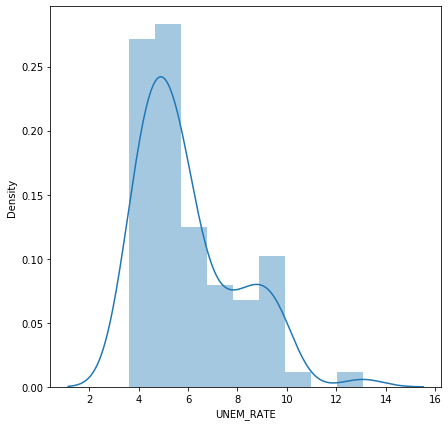

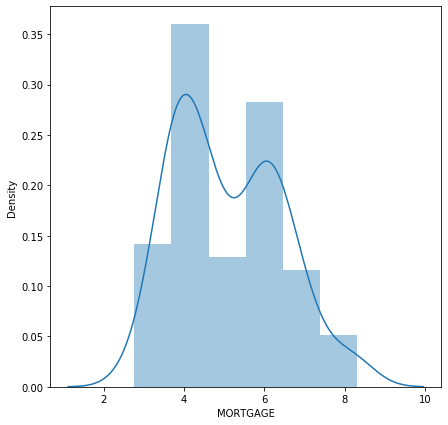

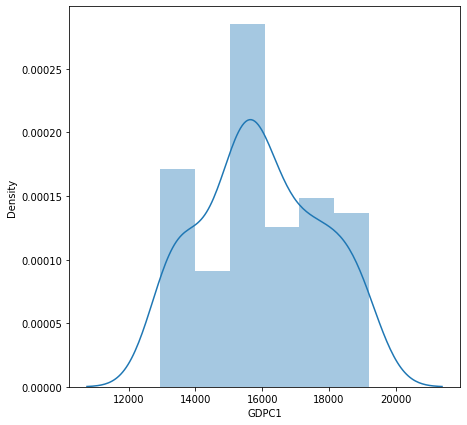

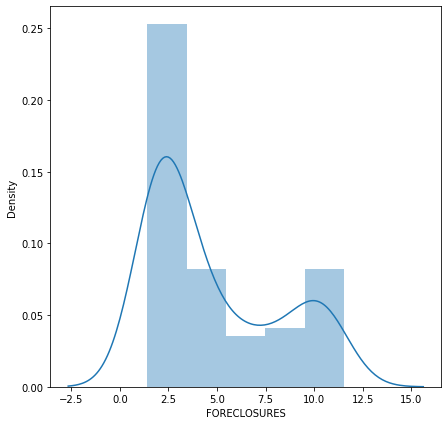

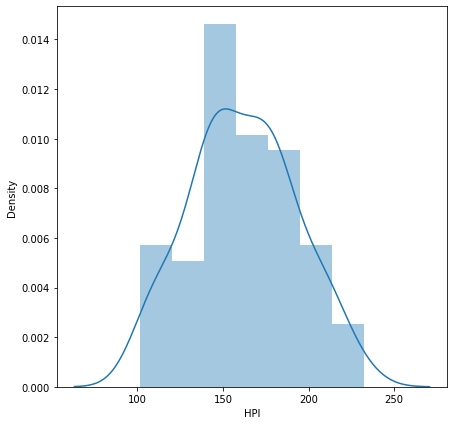

In [15]:
for feature in numerical_continuous_feature:
    plt.figure(figsize=(7,7))
    sns.distplot(df3[feature],kde=True)

Distribution plots are used to show probability distribution of different values in the dataset. 
each variable are showing theri density of data in above distplots.

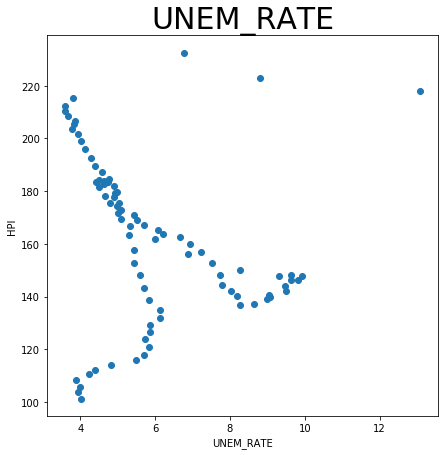

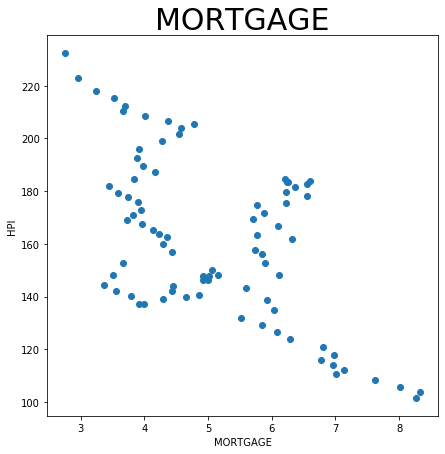

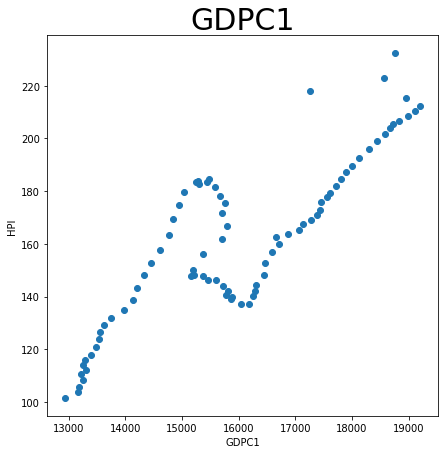

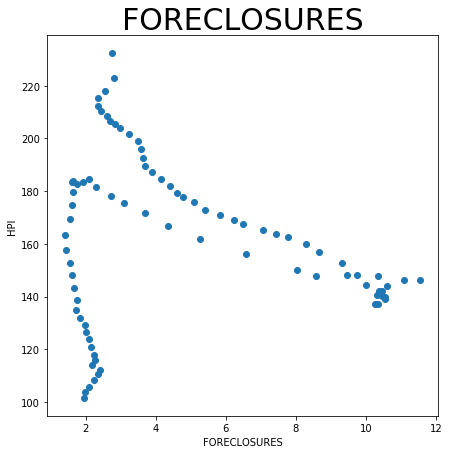

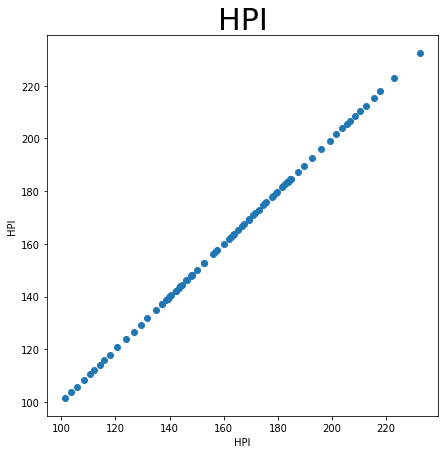

In [16]:
for feature in numerical_continuous_feature:
    plt.figure(figsize=(7,7))
    plt.scatter(x=feature,y='HPI',data=df3)
    plt.xlabel(feature)
    plt.ylabel("HPI")
    plt.title(feature,fontsize=30)

In [17]:
# => Before we go ahead with heatmaps and pairplots , 
# =>lets do transformation of the data and see the relation with respect to HPI once again

for feature in numerical_continuous_feature:
    df3[feature]=np.log(df3[feature])
# =>we use log() make the distribution more symmetric and stabilize the variance, which can be beneficial for further visualizations 

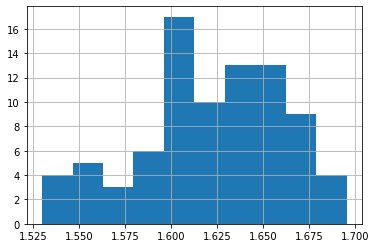

In [18]:
df3['HPI']=np.log(df3['HPI'])
df3['HPI'].hist();

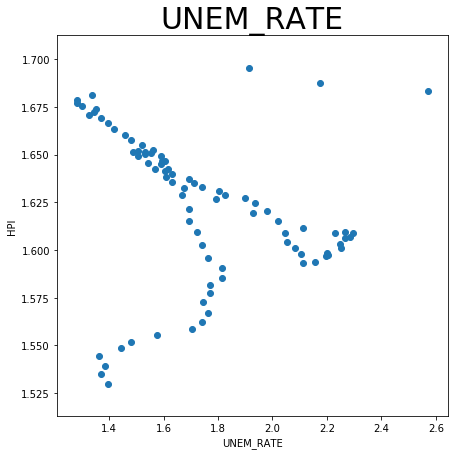

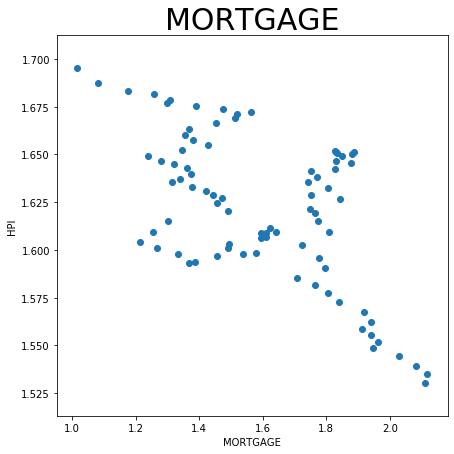

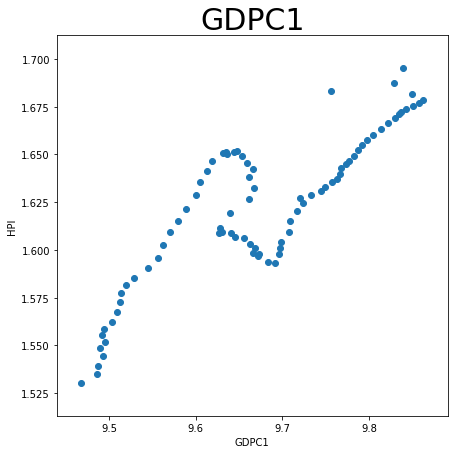

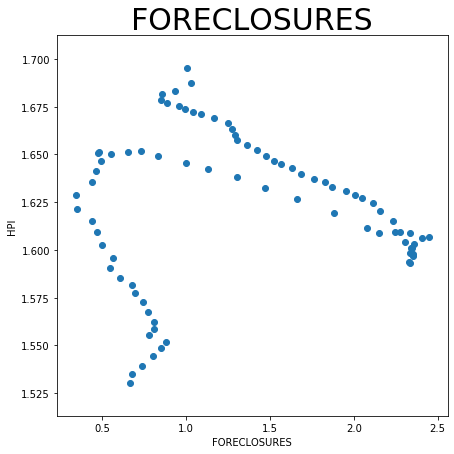

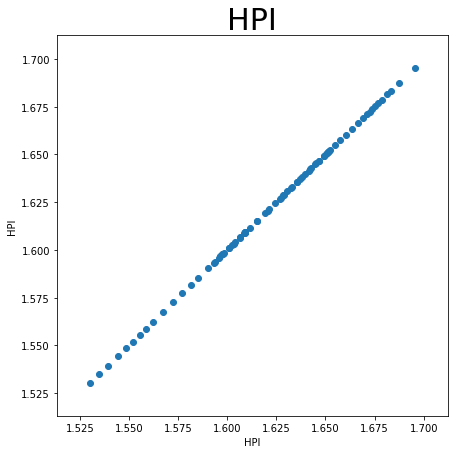

In [19]:
for feature in numerical_continuous_feature:
    plt.figure(figsize=(7,7))
    plt.scatter(x=feature,y='HPI',data=df3)
    plt.xlabel(feature)
    plt.ylabel("HPI")
    plt.title(feature,fontsize=30)

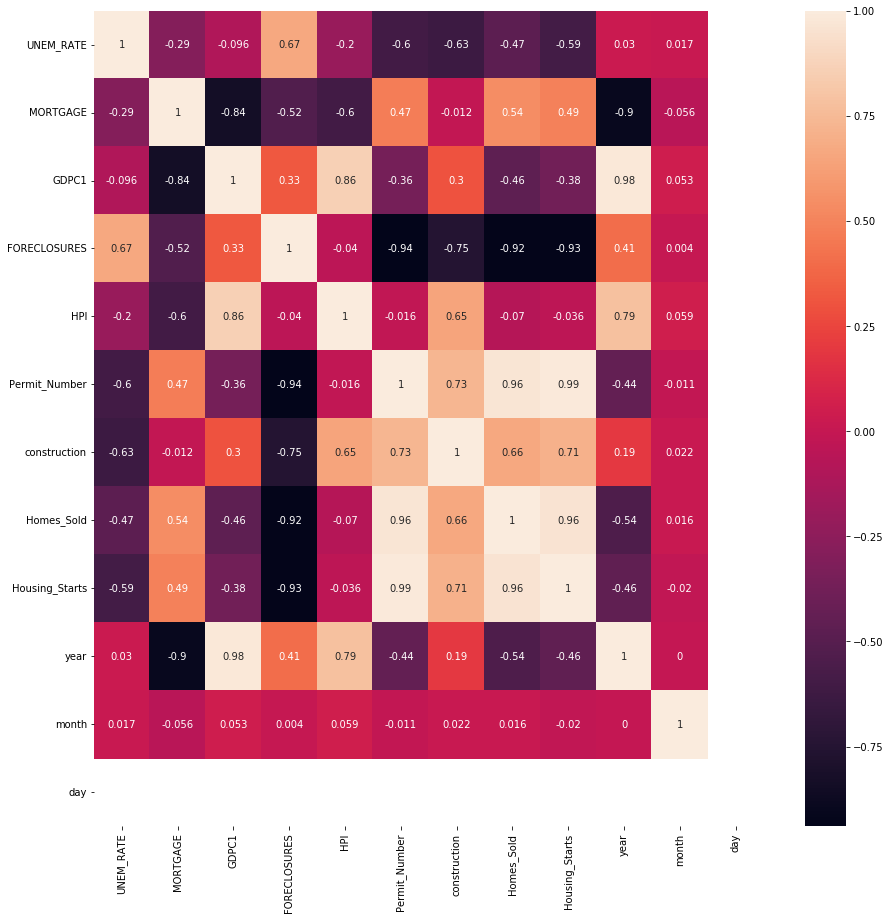

In [20]:
# checking the heatmaps and conclude if there is a factor that have any correlation with HPI
plt.figure(figsize=(15,15))
sns.heatmap(df3.corr(),annot=True)
plt.show()

 => GDPC1,construction ,year have very strong correlation with the HPI

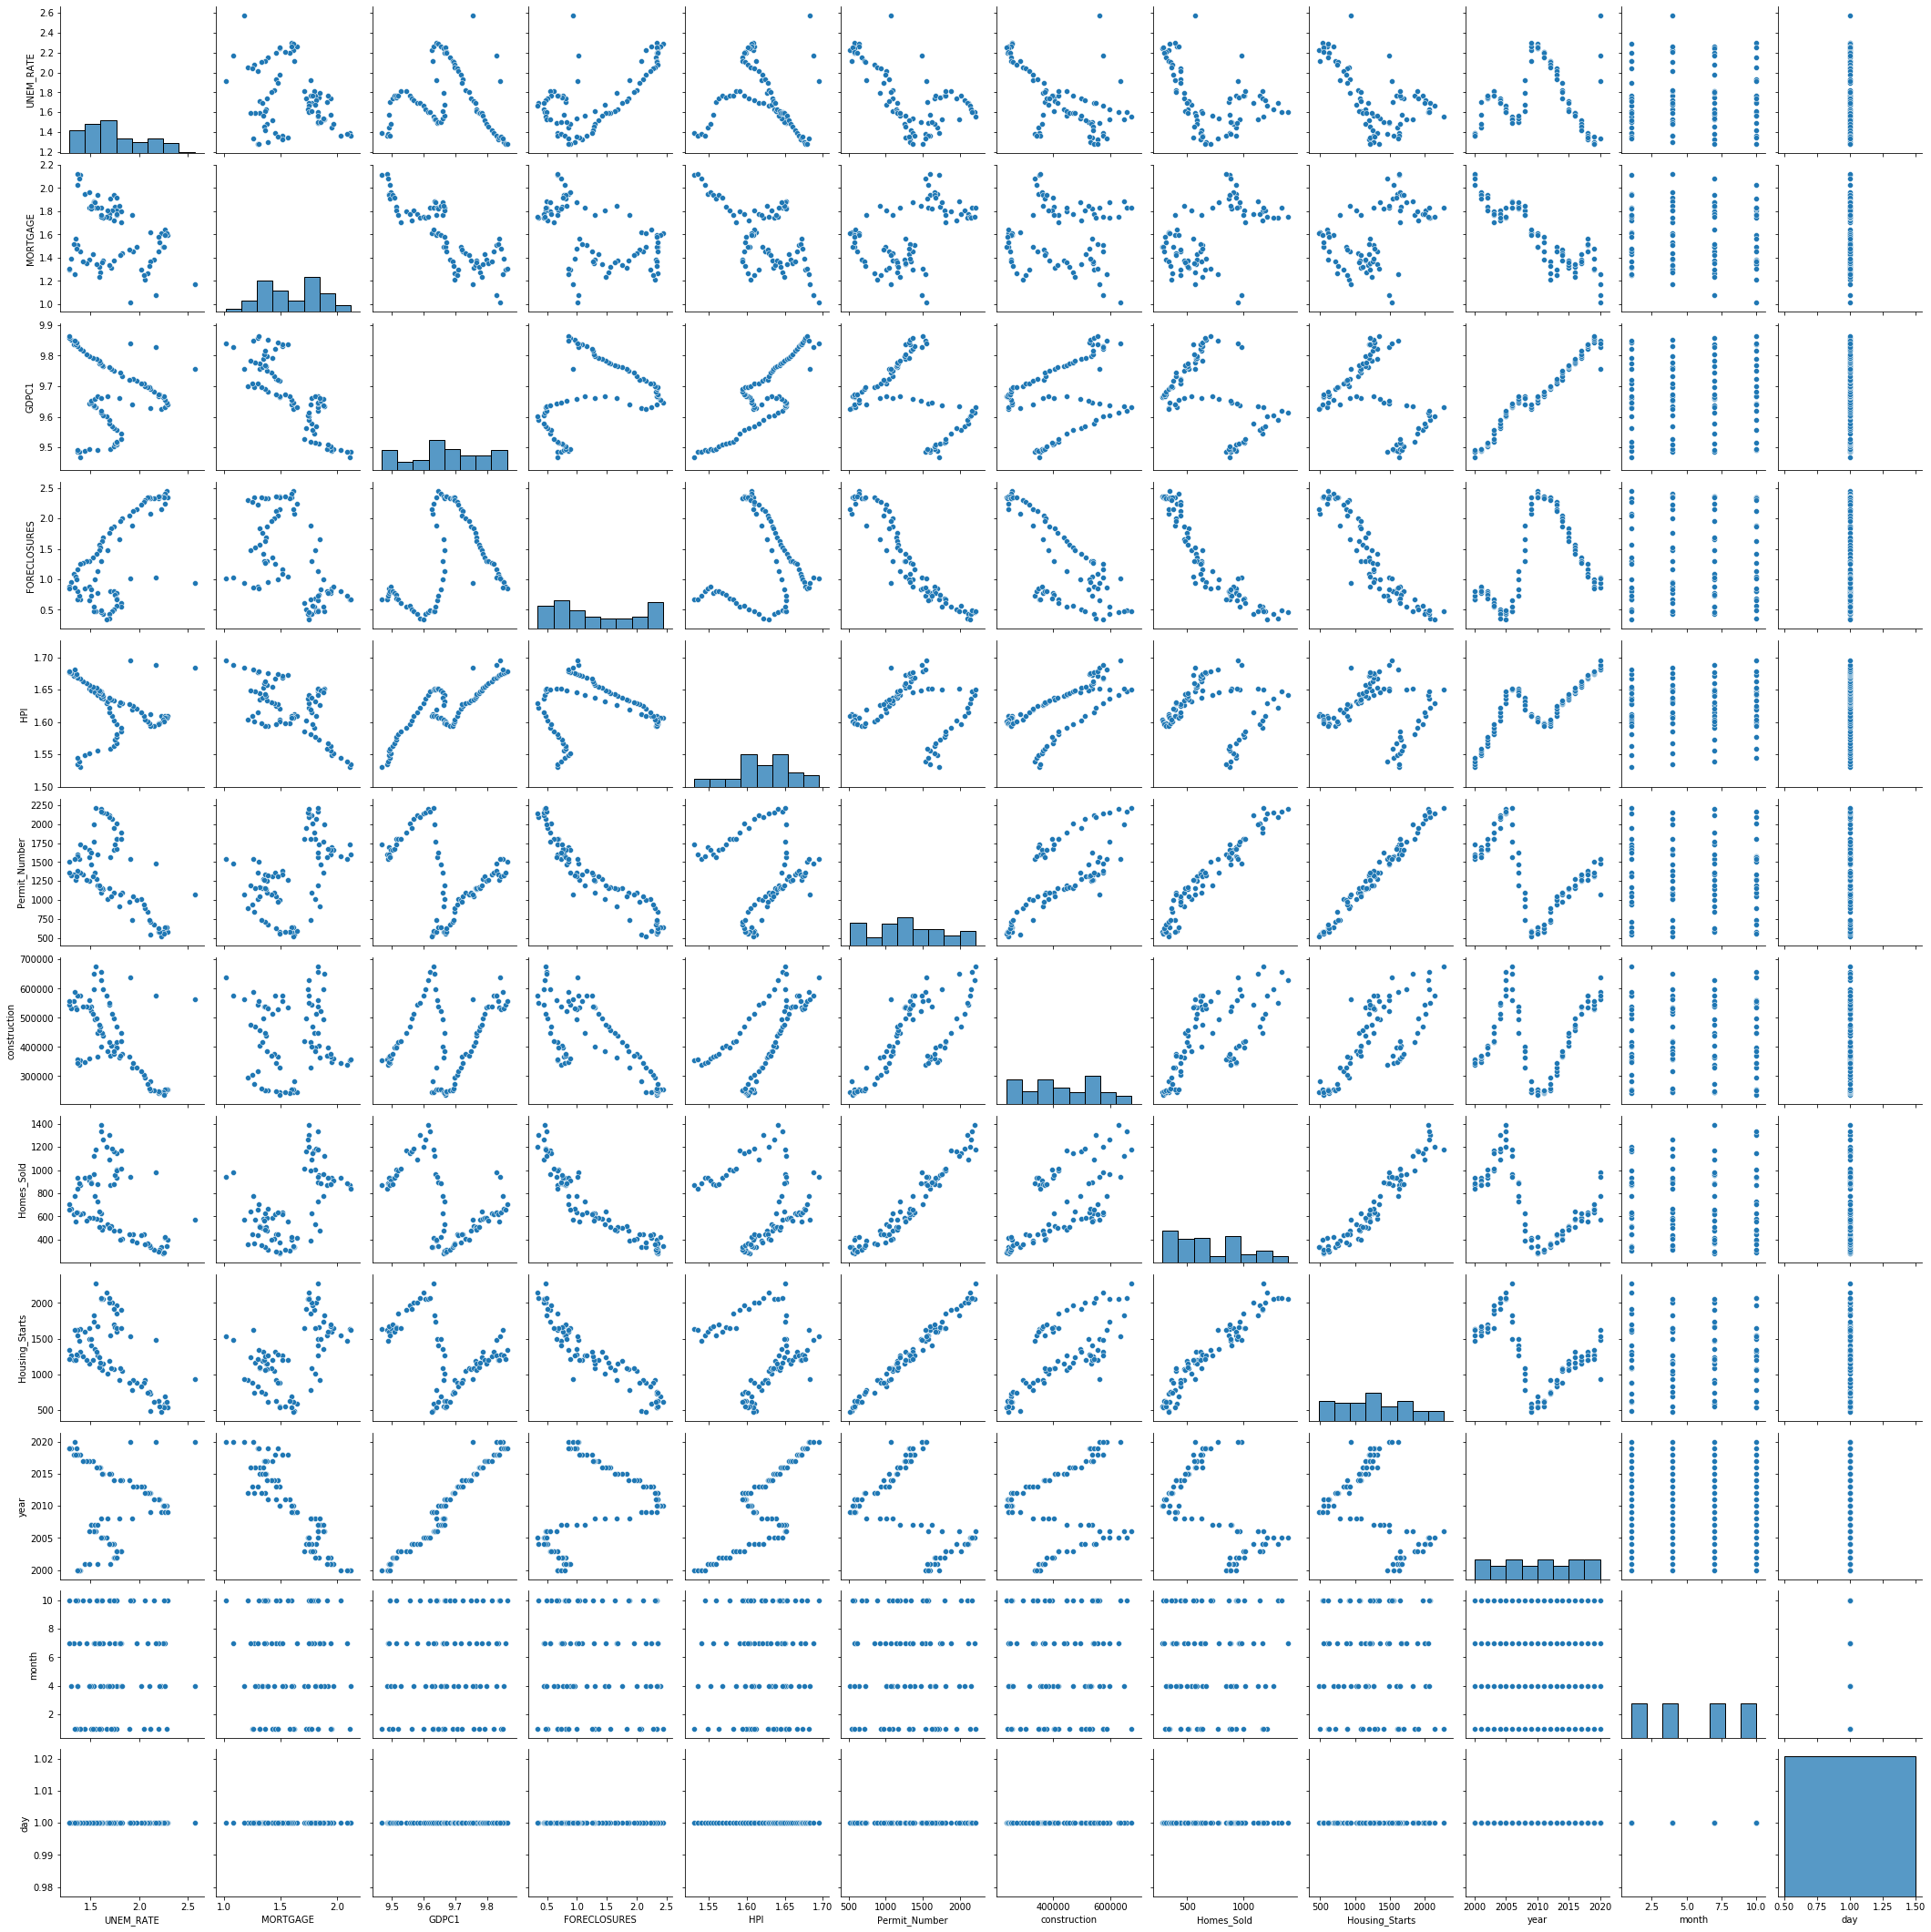

In [21]:
sns.pairplot(data=df3);

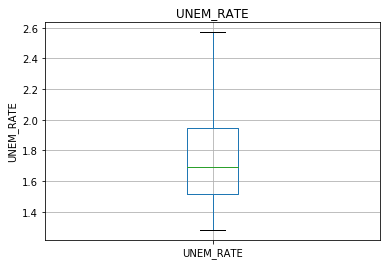

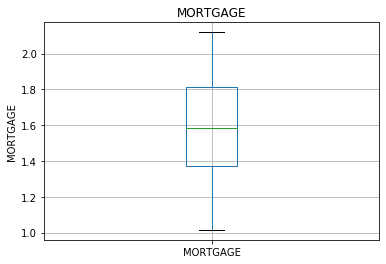

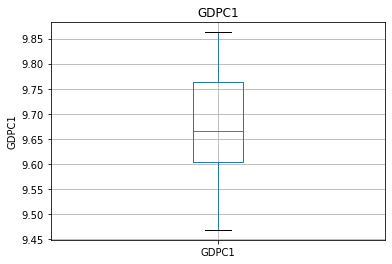

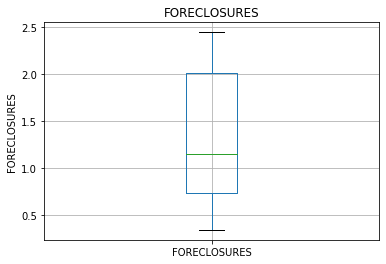

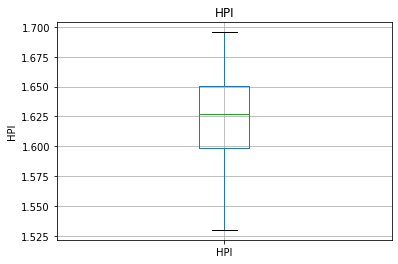

In [22]:
#looking for outliers
for feature in numerical_continuous_feature:
    data=df3.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()


by observing above boxplots we can say that the given variables are not having outliers.

In [23]:
##Checking NUMERICAL CONTINUOUS FEATURE: int type
numerical_continuous_feature = [feature for feature in df3.columns if df3[feature].dtype in ['int64', 'int32']]
df3[numerical_continuous_feature].head()


,Permit_Number,construction,Homes_Sold,Housing_Starts,year,month,day
0,1727,353065,873,1636,2000,1,1
1,1597,356188,841,1626,2000,4,1
2,1542,337374,887,1463,2000,7,1
3,1577,344095,933,1549,2000,10,1
4,1699,348279,936,1600,2001,1,1


NUMERICAL CONTINUOUS FEATURE is used to seperate datatypes(float and int) for better understanding and for graphical visualizations
as mentioned above i seperated int datatype and built some graphes for better understanding.

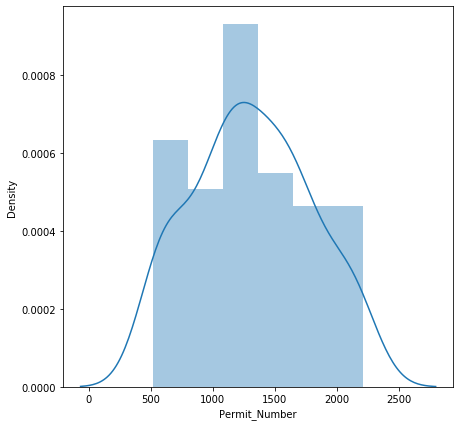

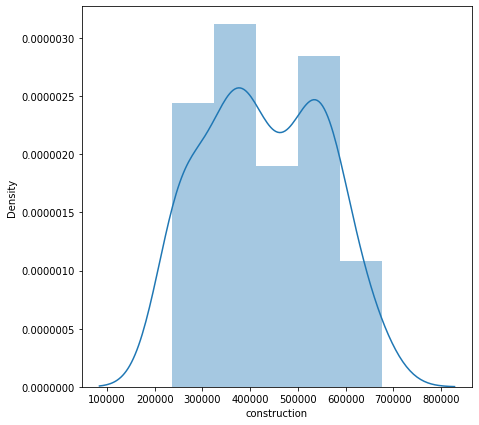

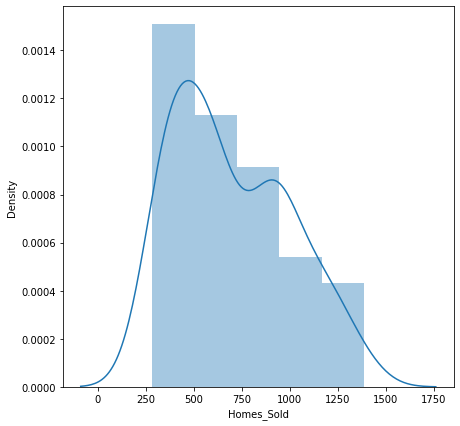

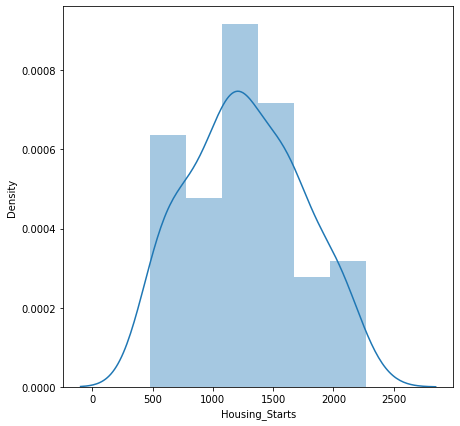

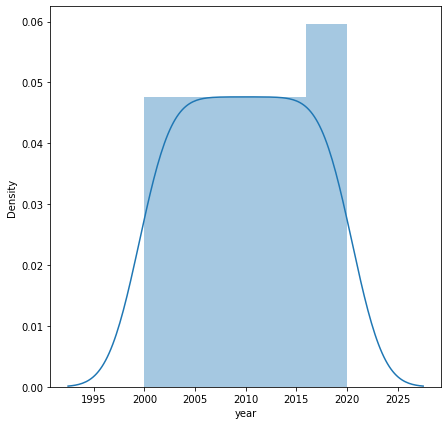

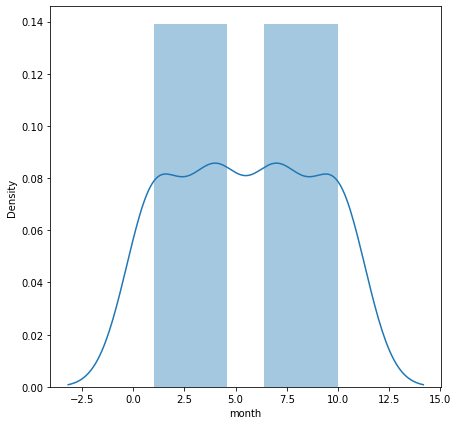

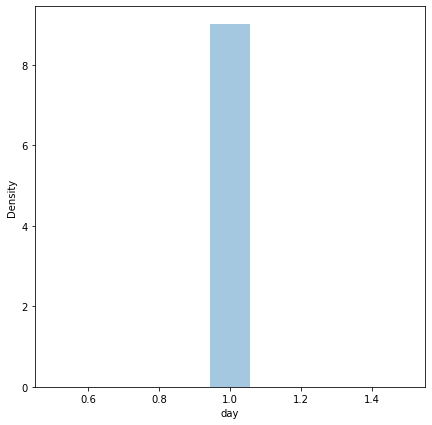

In [24]:
for feature in numerical_continuous_feature:
    plt.figure(figsize=(7,7))
    sns.distplot(df3[feature],kde=True)

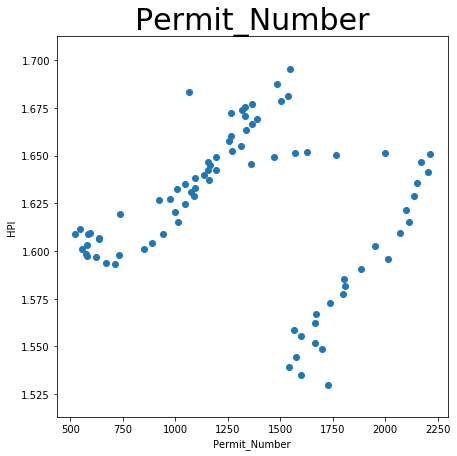

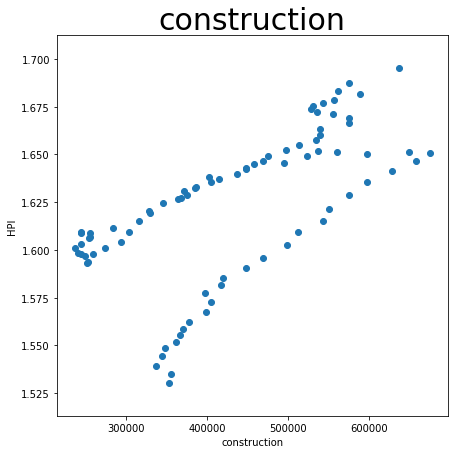

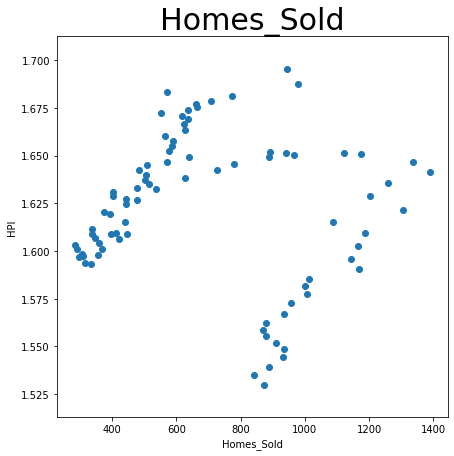

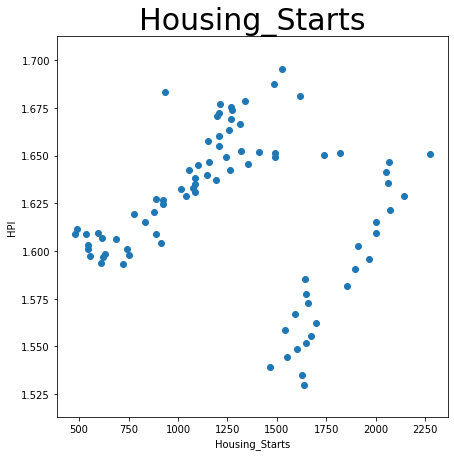

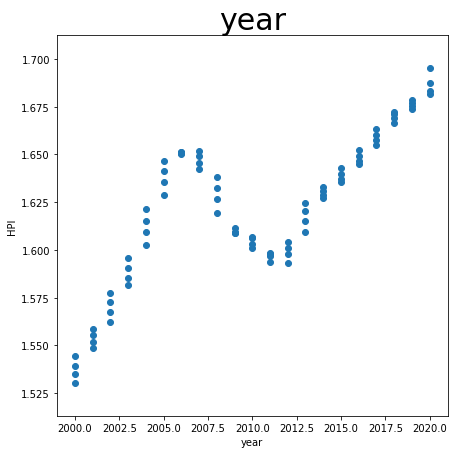

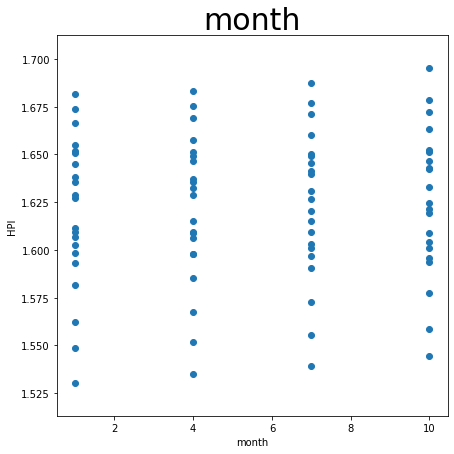

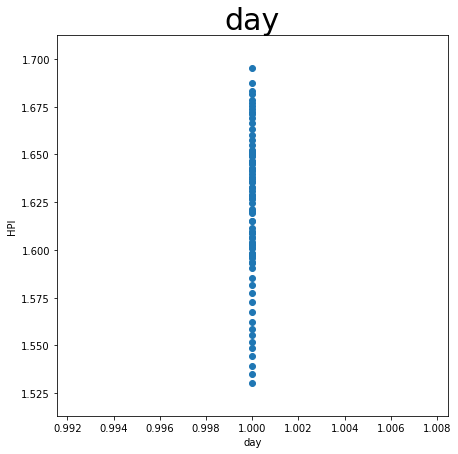

In [25]:
for feature in numerical_continuous_feature:
    plt.figure(figsize=(7,7))
    plt.scatter(x=feature,y='HPI',data=df3)
    plt.xlabel(feature)
    plt.ylabel("HPI")
    plt.title(feature,fontsize=30)

In [26]:
# => Before we go ahead with heatmaps and pairplots , lets do transformation of the data and see the relation with respect to HPI once again 
for feature in numerical_continuous_feature:
    df3[feature]=np.log(df3[feature])

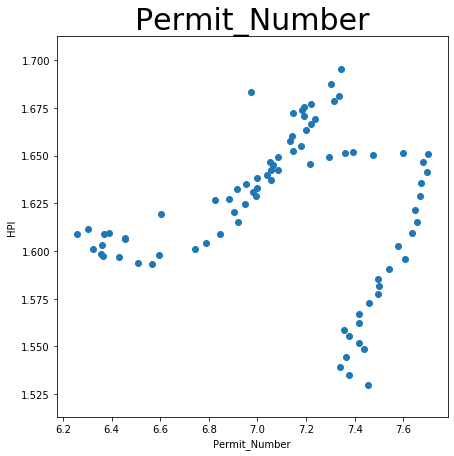

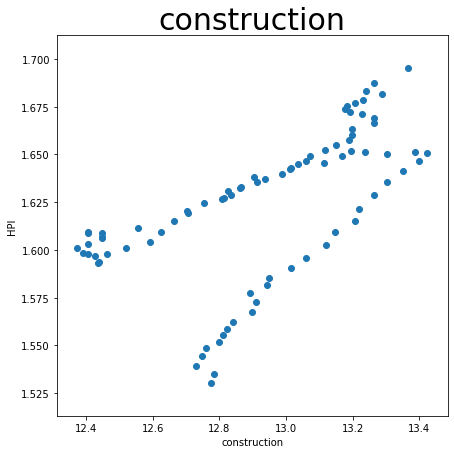

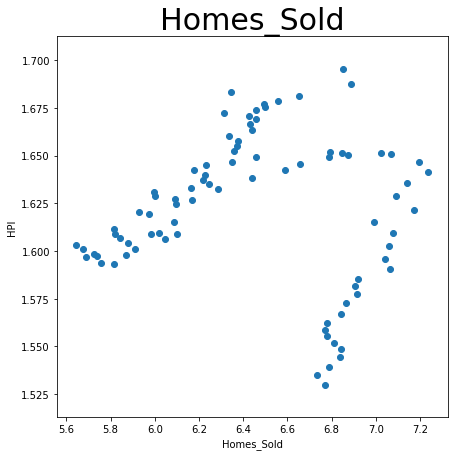

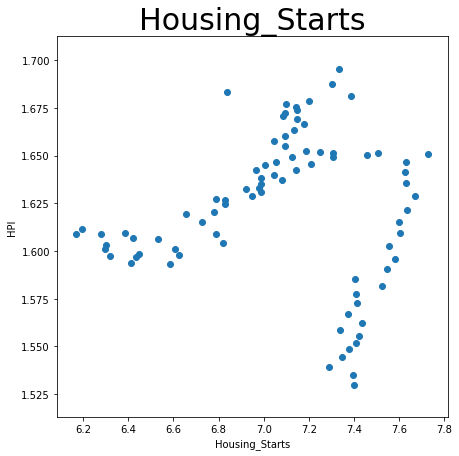

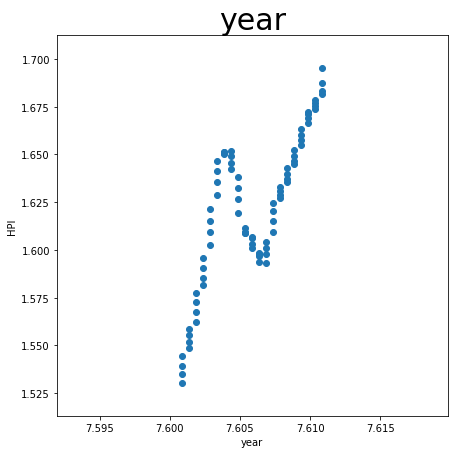

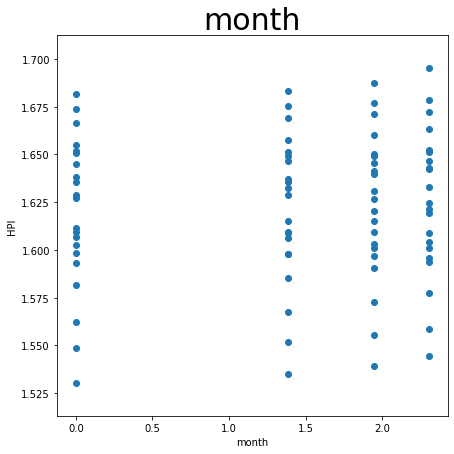

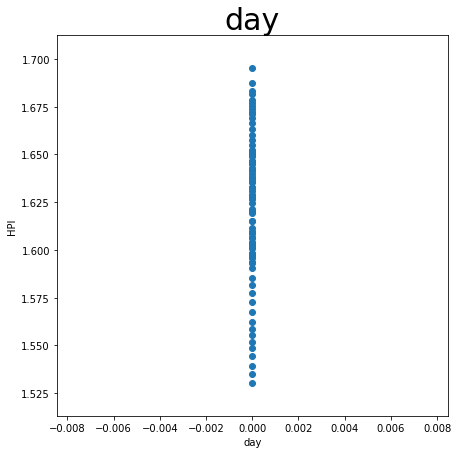

In [27]:
for feature in numerical_continuous_feature:
    plt.figure(figsize=(7,7))
    plt.scatter(x=feature,y='HPI',data=df3)
    plt.xlabel(feature)
    plt.ylabel("HPI")
    plt.title(feature,fontsize=30)

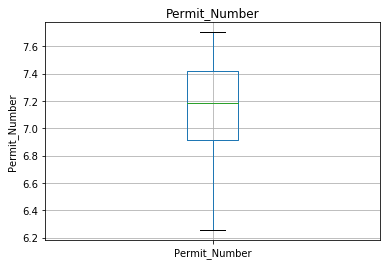

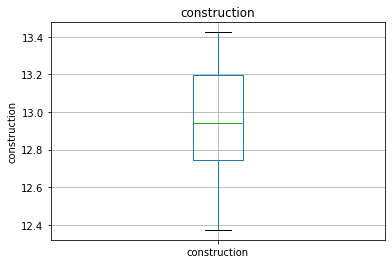

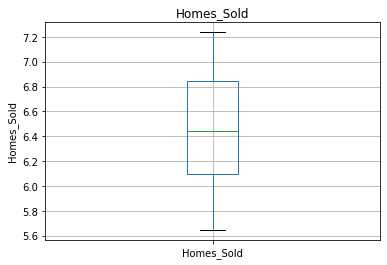

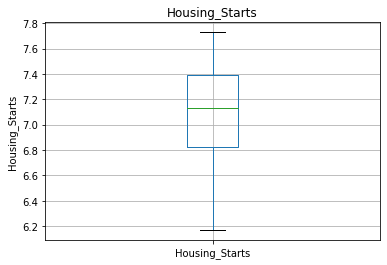

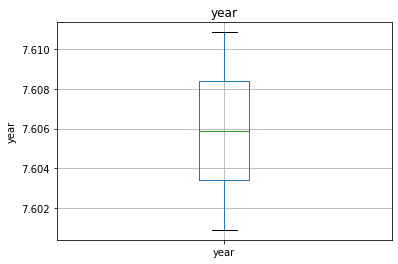

In [28]:
#looking for outliers
for feature in numerical_continuous_feature:
    data=df3.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

by observing above boxplots we can say that the given variables are not having outliers.

# Training & Testing

In [29]:
#importing some of the important libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [30]:
#seperating data into input as 'X' and output as 'y'
X=df3.drop(['HPI'],axis=1)    #---->independent
y=df3['HPI']                  #---->dependent

In [31]:
#spliting our dependent and independent features
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

so the data has divided into training and testing part and i selected 70% of data for training and remaining 30% of data for testing.

In [32]:
print(X_train.shape)
print(X_test.shape)

(58, 11)
(26, 11)


# Scaling
scaling is used to bring all the given data into specific range so the calculations can be smooth and we don't have to face huge difference in data.

In [33]:
#using a minmaxScaler
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
scaled_X_train= pd.DataFrame(minmax.fit_transform(X_train),columns=X_train.columns)
scaled_X_test=pd.DataFrame(minmax.transform(X_test),columns=X_test.columns)

# Model Building

In [34]:
#importing necessary libraries for model building
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [35]:
#Linear regression model
my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', LinearRegression())
                             ])


scores = -1 * cross_val_score(my_pipeline, X_train, y_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

MAE scores:
 [0.00374964 0.00398948 0.00385296 0.00434822 0.00560079]


In [36]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)

0.9760732159859462

#--------------------------------------------------------------------------------------#

In [37]:
#RandomForestRegressor model
my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor())
                             ])


scores = -1 * cross_val_score(my_pipeline, X_train, y_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

MAE scores:
 [0.00647016 0.00446969 0.00648593 0.00306853 0.00410128]


In [38]:
model=RandomForestRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)

0.8997823369793609

#--------------------------------------------------------------------------------------#

In [39]:
#GradientBoostingRegressor model
my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', GradientBoostingRegressor())
                             ])


scores = -1 * cross_val_score(my_pipeline, X_train, y_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

MAE scores:
 [0.00704472 0.0039066  0.00548896 0.00276647 0.00260957]


In [40]:
model=GradientBoostingRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)

0.9580990242214514

for all the above three models the Mean Absolute Error scores respectively are,
1. 0.004108218
2. 0.004745540
3. 0.00430198
by observing above figures we can conclude that the model with lowest MAE score is the best model which is "Linear regression model" in our case. Along with MAE score, "Linear regression model" is giving highest Accuracy of 97.60% as compared to other two models,hence we conclude that Linear regression model is best suitable for our given data.